# Visualizing with the `800_Pound_Gorilla` (aka `matplotlib`)
***

In [9]:
%matplotlib inline

# standard
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# I've got style,
# miles and miles
import seaborn as sns
sns.set()
sns.set_context('notebook', font_scale=1.5)
cp = sns.color_palette()

<br/>

### Thing 1: Line Chart (with many lines)
***

In [2]:
ts = pd.read_csv('data/ts.csv')

# casting to datetime is important for
# ensuring plots "just work"
ts = ts.assign(dt = pd.to_datetime(ts.dt))
ts.head()

,dt,kind,value
0,2000-01-01,A,1.442521
1,2000-01-02,A,1.981290
2,2000-01-03,A,1.586494
3,2000-01-04,A,1.378969
4,2000-01-05,A,-0.277937


In [3]:
# in matplotlib-land, the notion of a "tidy"
# dataframe matters not
dfp = ts.pivot(index='dt', columns='kind', values='value')
dfp.head()

kind,A,B,C,D
dt,,,,
2000-01-01,1.442521,1.808741,0.437415,0.096980
2000-01-02,1.981290,2.277020,0.706127,-1.523108
2000-01-03,1.586494,3.474392,1.358063,-3.100735
2000-01-04,1.378969,2.906132,0.262223,-2.660599
2000-01-05,-0.277937,3.489553,0.796743,-3.417402


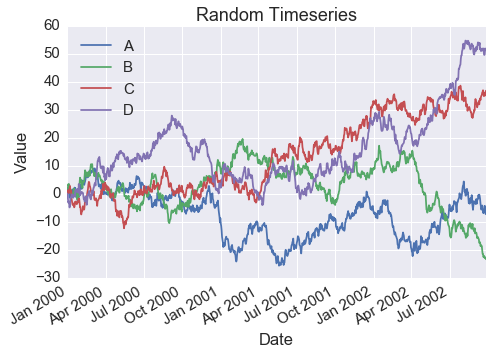

In [4]:
fig, ax = plt.subplots(1, 1,
                       figsize=(7.5, 5))

for k in ts.kind.unique():
    tmp = ts[ts.kind == k]
    ax.plot(tmp.dt, tmp.value, label=k)

ax.set(xlabel='Date',
       ylabel='Value',
       title='Random Timeseries')    
    
ax.legend(loc=2)
fig.autofmt_xdate()

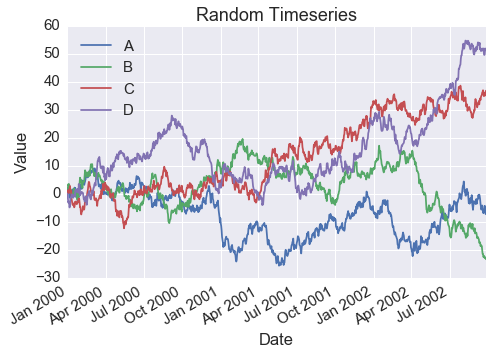

In [5]:
fig, ax = plt.subplots(1, 1,
                       figsize=(7.5, 5))

ax.plot(dfp)

ax.set(xlabel='Date',
       ylabel='Value',
       title='Random Timeseries')

ax.legend(dfp.columns, loc=2)
fig.autofmt_xdate()

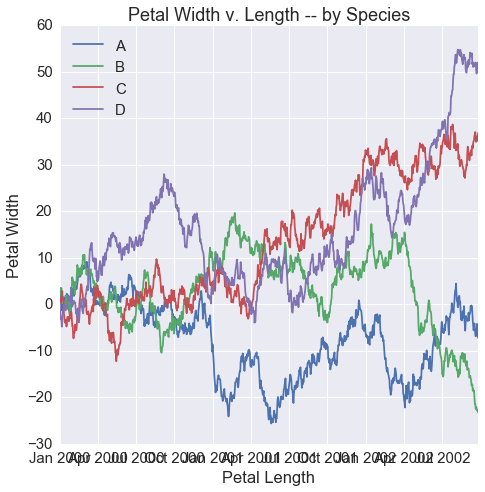

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 7.5))

def scatter(group):
    plt.plot(group['dt'],
             group['value'],
             label=group.name)

ts.groupby('kind').apply(scatter)

ax.set(xlabel='Petal Length',
       ylabel='Petal Width',
       title='Petal Width v. Length -- by Species')

ax.legend(loc=2)

<br/>

### Thing 2: Scatter
***

In [10]:
df = pd.read_csv('data/iris.csv')
df.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


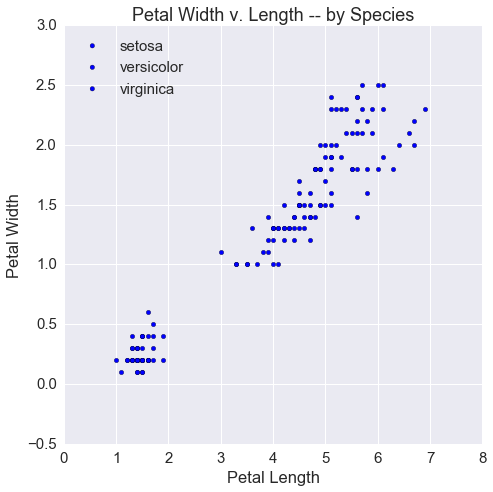

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 7.5))

for i, s in enumerate(df.species.unique()):
    tmp = df[df.species == s]
    ax.scatter(tmp.petalLength, tmp.petalWidth,
               label=s)

ax.set(xlabel='Petal Length',
       ylabel='Petal Width',
       title='Petal Width v. Length -- by Species')

ax.legend(loc=2)

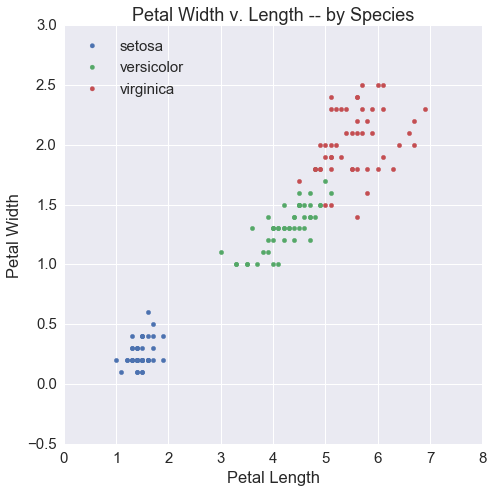

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 7.5))

for i, s in enumerate(df.species.unique()):
    tmp = df[df.species == s]
    ax.scatter(tmp.petalLength, tmp.petalWidth,
               label=s, color=cp[i])

ax.set(xlabel='Petal Length',
       ylabel='Petal Width',
       title='Petal Width v. Length -- by Species')

ax.legend(loc=2)

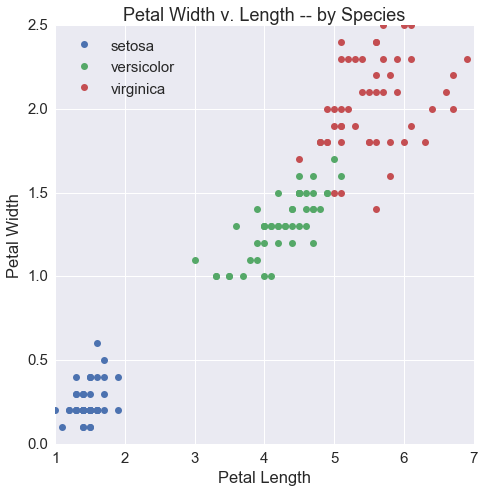

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 7.5))

def scatter(group):
    plt.plot(group['petalLength'],
             group['petalWidth'],
             'o', label=group.name)

df.groupby('species').apply(scatter)

ax.set(xlabel='Petal Length',
       ylabel='Petal Width',
       title='Petal Width v. Length -- by Species')

ax.legend(loc=2)

<br/>

### Thing 3: Trellising the Above
***

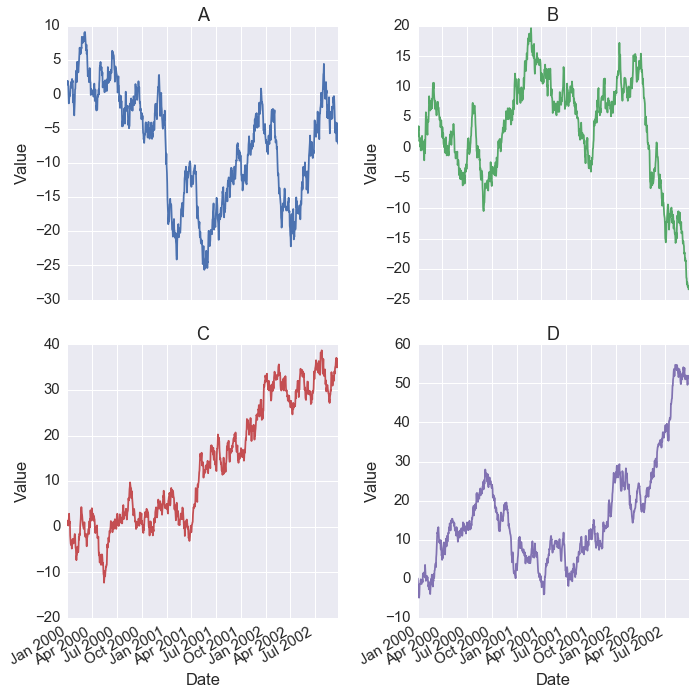

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for i, k in enumerate(ts.kind.unique()):
    ax = plt.subplot(int('22' + str(i + 1)))
    tmp = ts[ts.kind == k]
    ax.plot(tmp.dt, tmp.value, label=k, c=cp[i])

    ax.set(xlabel='Date',
           ylabel='Value',
           title=k)    
    
fig.autofmt_xdate()
fig.tight_layout()

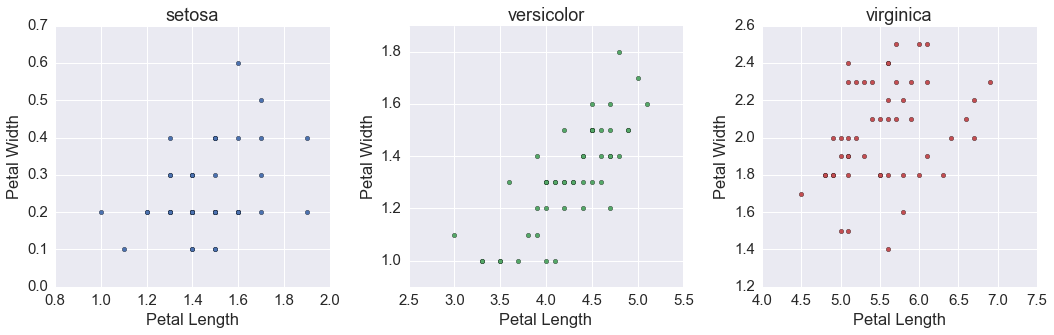

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, s in enumerate(df.species.unique()):
    tmp = df[df.species == s]

    ax[i].scatter(tmp.petalLength, tmp.petalWidth, c=cp[i])

    ax[i].set(xlabel='Petal Length',
              ylabel='Petal Width',
              title=s)

fig.tight_layout()

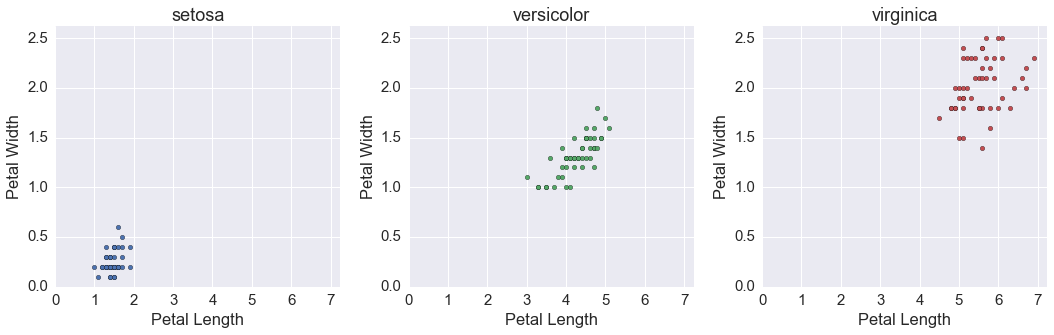

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, s in enumerate(df.species.unique()):
    tmp = df[df.species == s]

    ax[i].scatter(tmp.petalLength,
                  tmp.petalWidth,
                  c=cp[i])

    ax[i].set(xlabel='Petal Length',
              ylabel='Petal Width',
              title=s)

    ax[i].set_ylim(bottom=0, top=1.05*np.max(df.petalWidth))
    ax[i].set_xlim(left=0, right=1.05*np.max(df.petalLength))
    
fig.tight_layout()

In [15]:
tmp_n = df.shape[0] - df.shape[0]/2

df['random_factor'] = np.random.permutation(['A'] * tmp_n + ['B'] * (df.shape[0] - tmp_n))
df.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species,random_factor
0,1.4,0.2,5.1,3.5,setosa,A
1,1.4,0.2,4.9,3.0,setosa,A
2,1.3,0.2,4.7,3.2,setosa,B
3,1.5,0.2,4.6,3.1,setosa,A
4,1.4,0.2,5.0,3.6,setosa,B


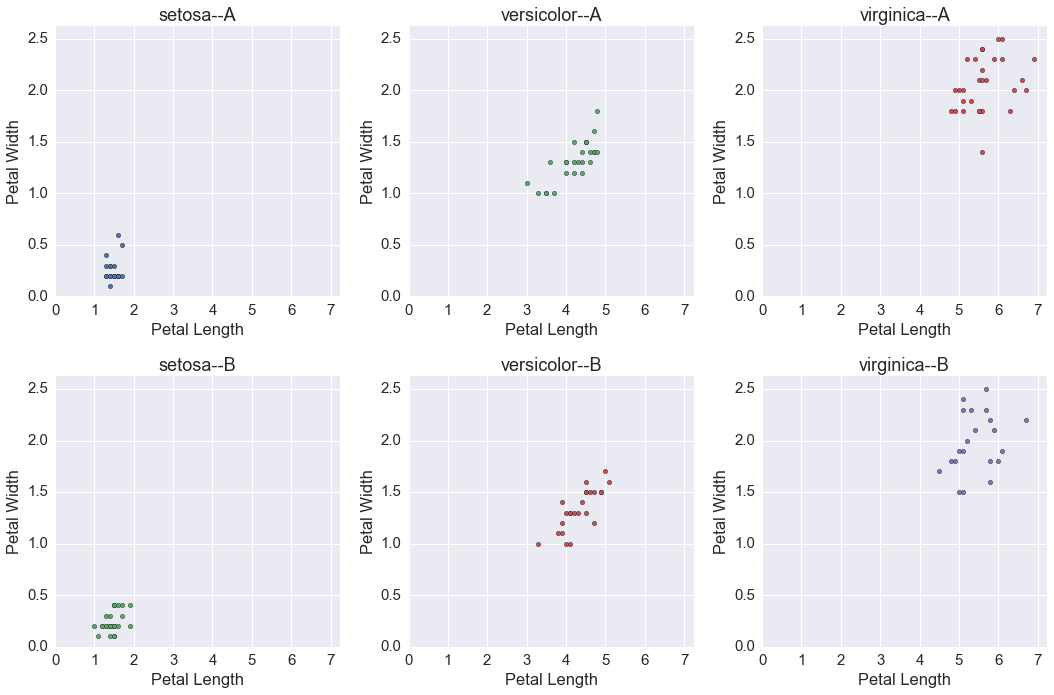

In [17]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# this is preposterous -- don't do this
for i, s in enumerate(df.species.unique()):
    for j, r in enumerate(df.random_factor.sort_values().unique()):
        tmp = df[(df.species == s) & (df.random_factor == r)]

        ax[j][i].scatter(tmp.petalLength,
                         tmp.petalWidth,
                         c=cp[i+j])

        ax[j][i].set(xlabel='Petal Length',
                     ylabel='Petal Width',
                     title=s + '--' + r)

        ax[j][i].set_ylim(bottom=0, top=1.05*np.max(df.petalWidth))
        ax[j][i].set_xlim(left=0, right=1.05*np.max(df.petalLength))
    
fig.tight_layout()

<br/>

### Thing 4: Visualizing Distributions (Boxplot and Histogram)
***

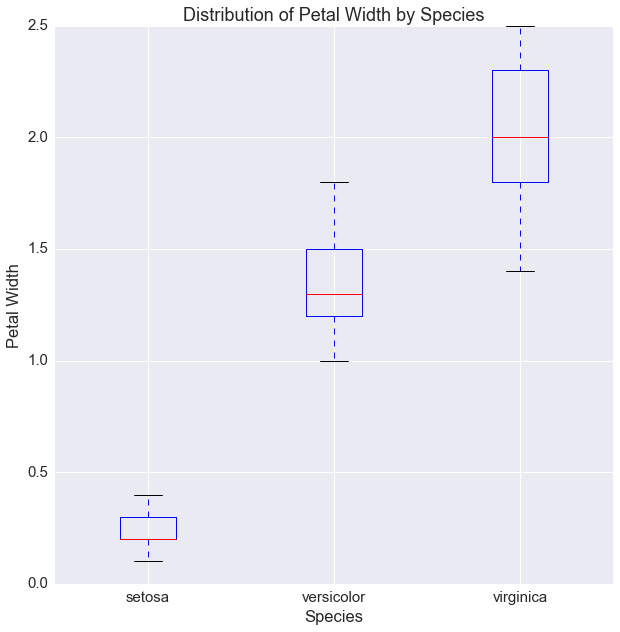

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.boxplot([df[df.species == s]['petalWidth'].values
                for s in df.species.unique()])

ax.set(xticklabels=df.species.unique(),
       xlabel='Species',
       ylabel='Petal Width',
       title='Distribution of Petal Width by Species')

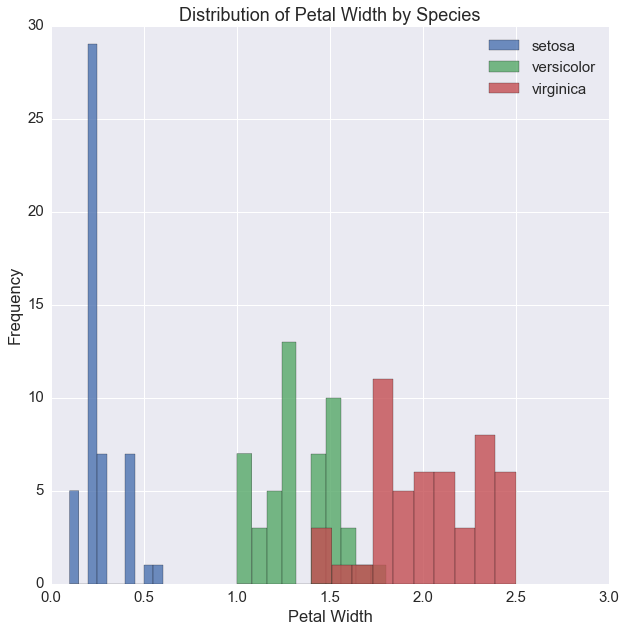

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i, s in enumerate(df.species.unique()):
    tmp = df[df.species == s]
    ax.hist(tmp.petalWidth, label=s, alpha=.8)

ax.set(xlabel='Petal Width',
       ylabel='Frequency',
       title='Distribution of Petal Width by Species')    

ax.legend(loc=1)

<br/>

### Thing 5: Bar Chart
***

In [21]:
df = pd.read_csv('data/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [22]:
dfg = df.groupby(['survived', 'pclass']).agg({'fare': 'mean'})
dfg

fare
survived pclass           
0        1       64.684008
         2       19.412328
         3       13.669364
1        1       95.608029
         2       22.055700
         3       13.694887

In [23]:
died = dfg.loc[0, :]
survived = dfg.loc[1, :]

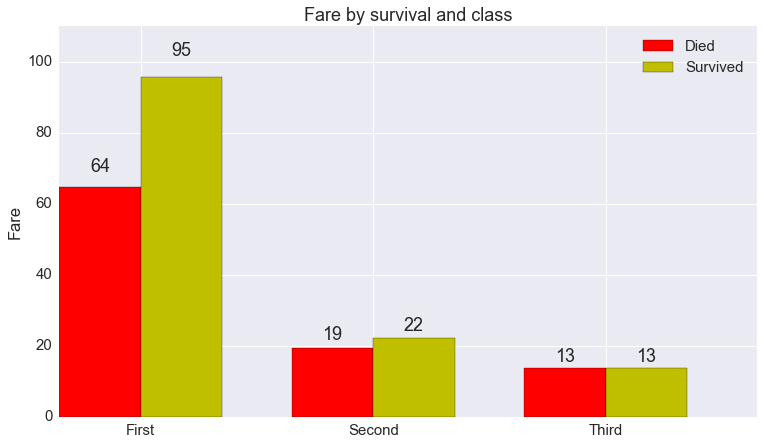

In [24]:
# more or less copied from matplotlib's own
# api example
fig, ax = plt.subplots(1, 1, figsize=(12.5, 7))

N = 3

ind = np.arange(N)  # the x locations for the groups
width = 0.35        # the width of the bars

rects1 = ax.bar(ind, died.fare, width, color='r')
rects2 = ax.bar(ind + width, survived.fare, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Fare')
ax.set_title('Fare by survival and class')
ax.set_xticks(ind + width)
ax.set_xticklabels(('First', 'Second', 'Third'))

ax.legend((rects1[0], rects2[0]), ('Died', 'Survived'))


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

ax.set_ylim(0, 110)        

autolabel(rects1)
autolabel(rects2)

plt.show()